# Explore here

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [30]:
data.shape

(366, 2)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [32]:
data['date'] = pd.to_datetime(data['date'])  # Convertimos la columna "date" al formato datetime

data['date'] = data['date'].dt.date   # Eliminamos las horas de la columna "date" y dejamos solo el día, el año y el mes

# .dt: accesorio especial para las columnas de tipo fecha y hora en pandas que permite acceder a métodos específicos de fecha y hora.
# .date: Este método se aplica al accesorio .dt y se utiliza para extraer solo la fecha (sin la hora) de cada valor de fecha y hora en la columna 'date'.
#Convierte los valores de fecha y hora en objetos de fecha (datetime.date), que representan solo la parte de fecha sin la parte de hora.

data.head()

,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633


In [33]:
print(data['date'].min(),data['date'].max())

2022-09-03 2023-09-03


In [34]:
data = data.set_index("date")  # establece la columna "date" como el índice del DataFrame
ts = data["sales"]

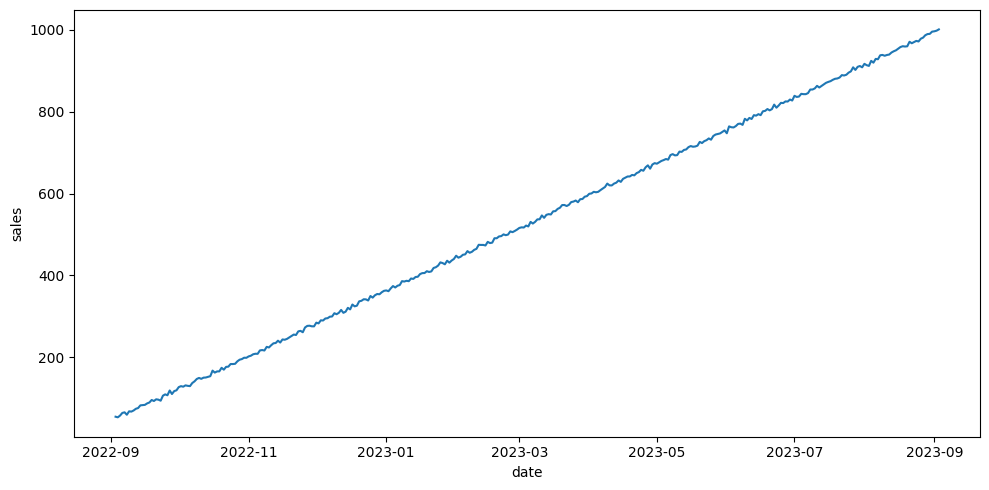

In [35]:
# Visualizamos la serie temporal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)

plt.tight_layout()

plt.show()

 - Tendencia: La tendencia es claramente ascendente, lo que indica un crecimiento constante en las ventas a lo largo del tiempo. Esto podría deberse a un aumento en la demanda de los productos o servicios ofrecidos.

 - Estacionalidad: Dado que no se observa una variación cíclica o estacional clara en los datos, es posible que no haya patrones estacionales significativos en las ventas. Sin embargo, para confirmar esto, sería necesario realizar un análisis más detallado, como descomponer la serie temporal en componentes de tendencia, estacionalidad y residuos.

 - Variabilidad: La variabilidad en la serie parece ser relativamente baja, ya que la línea es casi recta. Esto sugiere una consistencia en las ventas a lo largo del tiempo, con poca fluctuación.

 - Puntos atípicos: No parece haber puntos atípicos o valores extremadamente altos o bajos que se aparten significativamente de la tendencia general de crecimiento. Sin embargo, para confirmar la presencia de puntos atípicos, sería necesario realizar un análisis estadístico más exhaustivo, como identificar valores atípicos basados en criterios específicos.

 - Puntos de inflexión: Dado que la serie muestra una tendencia claramente ascendente sin cambios bruscos en la dirección, es poco probable que haya puntos de inflexión evidentes en los datos. Los puntos de inflexión representan cambios en la dirección de la tendencia, y su ausencia sugiere una evolución gradual y constante en las ventas.

Descomposición de la serie

In [36]:
decomposition = seasonal_decompose(ts, period = 12)
decomposition

# función 'seasonal_decompose' a la serie temporal 'ts' con un período de estacionalidad especificado como '12'.
# La estacionalidad se refiere a patrones que se repiten a lo largo de un período fijo, como los ciclos estacionales mensuales en datos de ventas.
# El parámetro period especifica la longitud del período estacional. En este caso, se asume que hay una estacionalidad de 12 meses (un año).

<statsmodels.tsa.seasonal.DecomposeResult at 0x7f7947b08dc0> es la representación del objeto devuelto por la función seasonal_decompose de statsmodels. Este objeto contiene los resultados de la descomposición estacional, que incluyen la tendencia, la estacionalidad y el residuo. Puedes acceder a estos componentes a través de los atributos del objeto DecomposeResult.

 - Análisis de tendencia

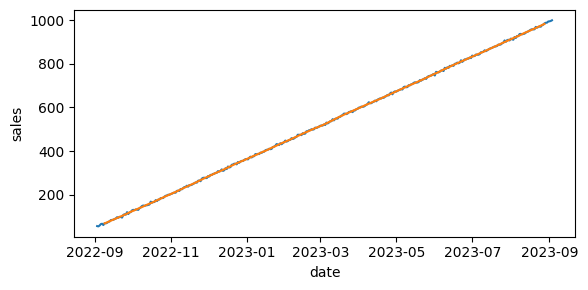

In [41]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (6, 3))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

 - Análisis de estacionalidad

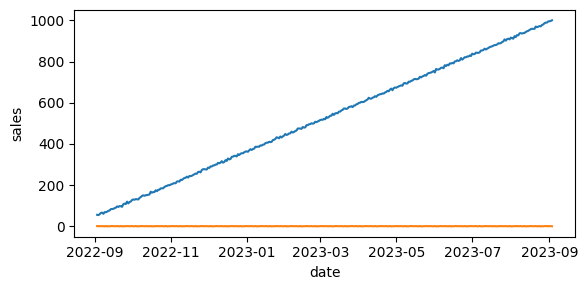

In [42]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (6, 3))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

Para evaluar la estacionalidad de la serie temporal aplicamos la Prueba de Dickey-Fuller (Dickey-Fuller test), que es un contraste de hipótesis en el que la hipótesis nula es que la serie es estacionaria, y la alternativa, que es no estacionaria.

In [45]:
# Prueba de Dickey-Fuller

# from statsmodels.tsa.stattools import adfuller - 'adfuller' función se utiliza para realizar la prueba de Dickey-Fuller aumentada (ADF).
                                                 # prueba de hipótesis para verificar la estacionariedad de una serie temporal.

def test_stationarity(timeseries):     # función que toma una serie temporal como entrada
    print("Resultados de la prueba de Dickey-Fuller:")
    
    # Realización de la prueba de Dickey-Fuller:
    dftest = adfuller(timeseries, autolag = "AIC")  # autolag="AIC" especifica que el criterio de información Akaike (AIC) se usará para determinar el número de rezagos en el modelo
    
    # Creación de una Serie Pandas para mostrar los resultados:
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "Lags Used", "Number of Observations Used"])  # Los primeros cuatro elementos de dftest son el estadístico de la prueba, el valor p, el número de rezagos utilizados en la regresión y el número de observaciones utilizadas en la prueba. Estos valores se asignan a la serie dfoutput con etiquetas descriptivas.

    # Inclusión de los valores críticos en la salida:
    for key,value in dftest[4].items():              # Se agregan los valores críticos correspondientes a diferentes niveles de significancia a la serie dfoutput.
        dfoutput["Critical Value (%s)"%key] = value  # Estos valores están almacenados en el quinto elemento de dftest, que es un diccionario
    return dfoutput                                  #  con etiquetas que indican el nivel de significancia y los valores críticos asociados.

test_stationarity(ts)

# dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"]): 
#   Crea una serie de pandas (pd.Series) llamada dfoutput que contiene los resultados clave de la prueba de Dickey-Fuller. 

# dftest[0:4] contiene los primeros 4 elementos del resultado de la prueba, que son el estadístico de prueba, el valor p, el número de retrasos utilizados y el número de observaciones utilizadas, respectivamente.
#   Los nombres de los índices se proporcionan como "Test Statistic", "p-value", "#Lags Used" y "Number of Observations Used".

# for key, value in dftest[4].items(): Itera sobre el diccionario devuelto por la prueba de Dickey-Fuller.
#   Este diccionario contiene los valores críticos para diferentes niveles de significancia.

# dfoutput["Critical Value (%s)" % key] = value: Para cada valor crítico, se agrega una nueva entrada a dfoutput 
#    con el nombre del índice como "Critical Value (%s)" % key y el valor correspondiente.

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
Lags Used                       13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

 - Si el valor del estadístico de prueba es menor que los valores críticos, podemos rechazar la hipótesis nula de que la serie temporal es no estacionaria.
 - Si el valor p es menor que un nivel de significancia elegido (por ejemplo, 0.05), también podemos rechazar la hipótesis nula.
 
En este caso, el valor p es bastante alto (0.986190), lo que sugiere que no tenemos suficiente evidencia para rechazar la hipótesis nula de no estacionariedad. Además, el estadístico de prueba es mayor que los valores críticos, lo que respalda esta conclusión.